260 310
B1: 495.3076923076923, eradication: 487.8175607330191, roguing: 480.3274291583458


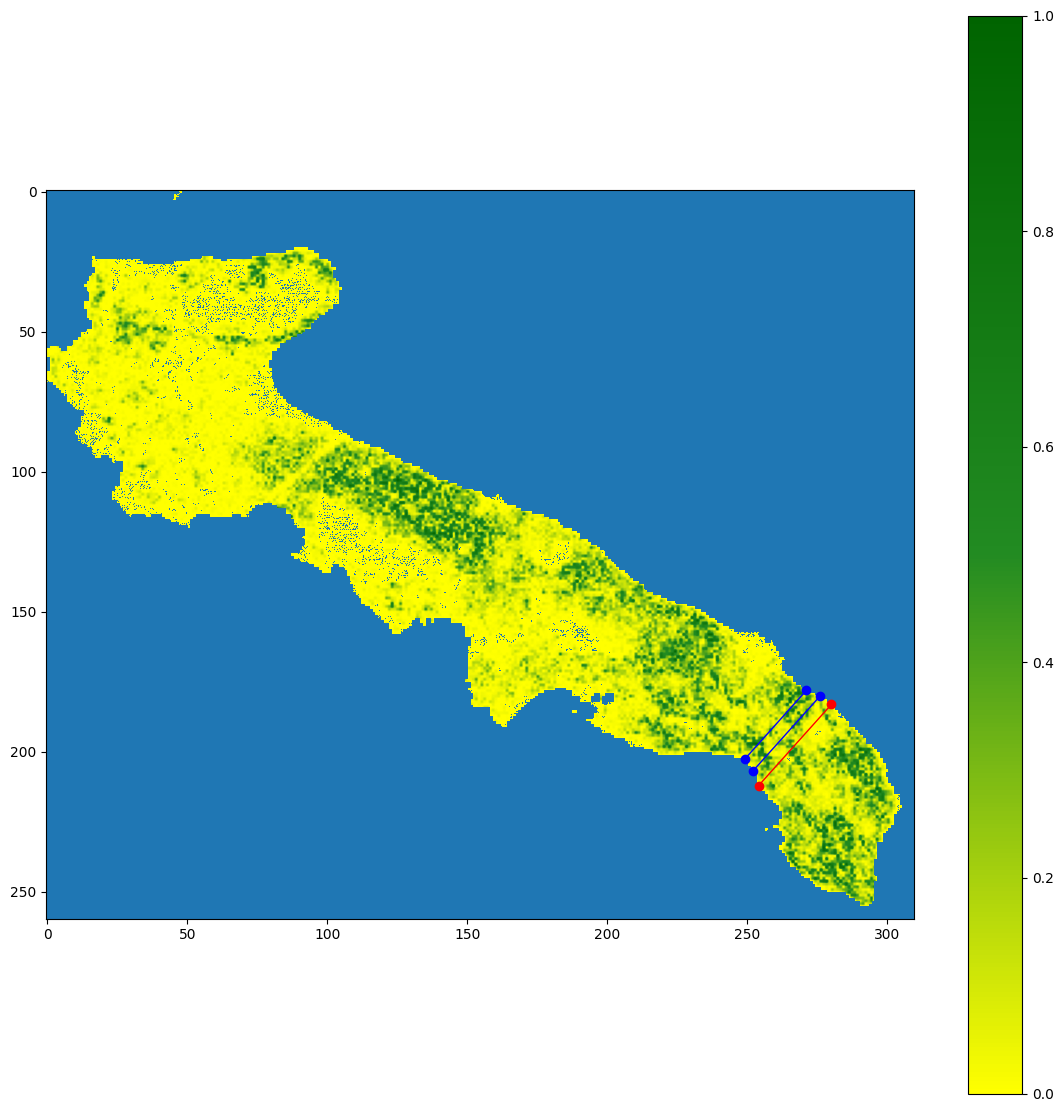

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy as sp

np.random.seed(3)

# Load data from url: https://github.com/drsmwhite/Xylella-spread-model/tree/master
mat = sp.io.loadmat("olivegrowthprop.mat")
olive_prop = mat["olivegrowthprop"]
height, width = olive_prop.shape
print(height, width)

# Plot distribution of olive groves
fig, ax = plt.subplots(figsize=(14,14))
cmap_custom = colors.LinearSegmentedColormap.from_list("", ["yellow", "forestgreen", "darkgreen"]) # matplotlib.cm.YlGn
cmap_custom.set_under("tab:blue")
im = ax.imshow(olive_prop, cmap=cmap_custom, vmin=0) 
fig.colorbar(im) # , extend="min")


# Buffer zone definition
xp1 = 254 # 253
yp1 = 212 # 212
xp2 = 280 # 278
yp2 = 183 # 183

BW = 5 # eradication zone width
BW2 = 5 # buffer zone width 

A1 = (yp1 - yp2) / (xp1 - xp2)
B1 = yp1 - A1 * xp1
B2_erad = B1 - BW * np.sqrt(A1**2 + 1)
B2_rog = B1 - (BW + BW2) * np.sqrt(A1**2 + 1)

print(f"B1: {B1}, eradication: {B2_erad}, roguing: {B2_rog}")

ax.plot((xp1, xp2), (yp1, yp2), 'ro-', linewidth=1) # infection line

x_erad1 = xp1 - 2
x_erad2 = xp2 - 4
y_erad1 = A1 * x_erad1 + B2_erad
y_erad2 = A1 * x_erad2 + B2_erad
ax.plot((x_erad1, x_erad2), (y_erad1, y_erad2), 'bo-', linewidth=1) # eradication line (eradication zone limit)

x_rog1 = xp1 - 5
x_rog2 = xp2 - 9
y_rog1 = A1 * x_rog1 + B2_rog
y_rog2 = A1 * x_rog2 + B2_rog
ax.plot((x_rog1, x_rog2), (y_rog1, y_rog2), 'bo-', linewidth=1) # roguing line (buffer zone limit)

plt.show()

In [ ]:
# SIMULATE DIFFUSION

# Carrying capacity
a = 0.1 # is the carrying capacity in nonolive grove habitat, relative to that in olive groves
K = olive_prop + a * (1 - olive_prop)

# Infections 
A = 3
B = 14.069
time_steps = 10

# Gompertz function models growth in a cell: N_t(x,y) = K(x,y)*e^(-B*e^(-At))
U = np.zeros((time_steps, width, height)) # Fraction of infected

print(np.where(olive_prop < 0)) # collect all coordinates where olive_prop < 0: disease seed has to be inside the region, not in the sea. TODO
seed = np.random.randint((0,0),(width,height))
U[0, seed] = K[0,0] * np.exp(-B) # initial outbreak

for t in range(time_steps-1): # evolution
    
    

    U[t+1,:,:] = K ** (1 - np.exp(-A)) * (U[t,:,:] ** np.exp(-A))


# Short-distance dispersal
beta = 0.1 # kilometers
d = np.random.exponential(beta) # generate random distance according to short-distance dispersal kernel
theta = np.random.random()*2*np.pi # generate random dispersal angle
x = d * np.cos(theta)
y = d * np.sin(theta)
# check that the dispersal doesn't go into the sea TODO

# Long distance dispersal TODO

In [194]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd

data2022 = pd.read_csv("Data/CAMP_2022.csv", encoding='latin-1') # , skiprows=
# pd.DataFrame(pd.read_excel("Data/CAMP_2022.xlsx"))

# read_file = pd.read_excel("Data/CAMP_2022.xlsx") 
# read_file.to_csv ("Data/CAMP_2022.csv",
#                   index = None, 
#                   header=True) 
# data2022 = pd.DataFrame(pd.read_csv("Data/CAMP_2022.csv")) 

display(data2022.head())

# Extract latitude and longitude
latitudes = data2022["LATITUDINE"].values
longitudes = data2022["LONGITUDINE"].values


,ID,DATA_RILEVAMENTO,TIPOLOGIA,SPECIE,CULTIVAR,SINTOMO,LATITUDINE,LONGITUDINE,COMUNE,RISULTATO
0,1320420,22/06/2022,Campione,Olivo (Olea europaea),Cima di Mola,Assente,41.000950,17.174447,Polignano a Mare,Negativo
1,1320749,22/06/2022,Campione,Olivo (Olea europaea),Altro,Assente,41.000285,17.176400,Polignano a Mare,Negativo
2,1321226,22/06/2022,Campione,Olivo (Olea europaea),Cima di Mola,Assente,40.999828,17.174302,Polignano a Mare,Negativo
3,1321444,22/06/2022,Campione,Olivo (Olea europaea),Cima di Mola,Assente,41.001559,17.175157,Polignano a Mare,Negativo
4,1320518,22/06/2022,Campione,Olivo (Olea europaea),Altro,Assente,40.868763,17.384971,Fasano,Negativo


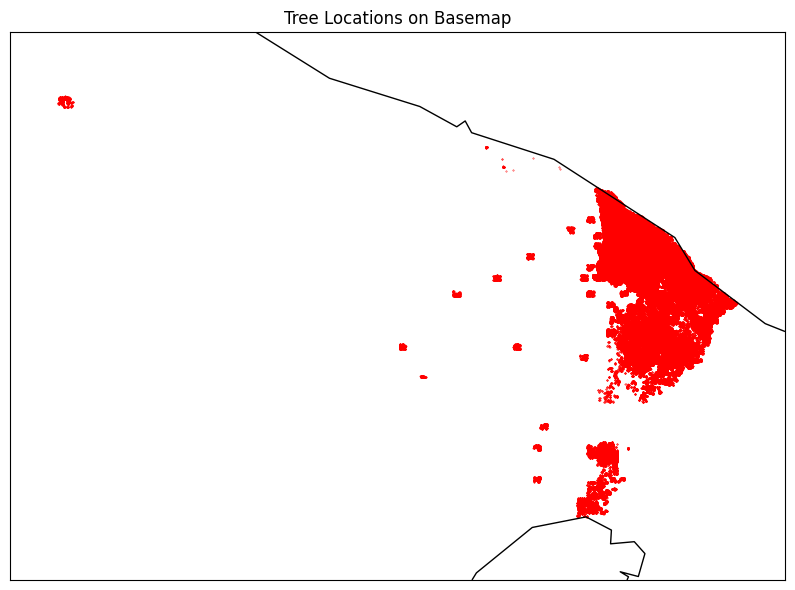

In [182]:
# TODO: gather all datas from yearly monitoring campaigns and do timeseries/animation of yearly advancement. 
# Just plot to see if there are holes in the continuation of the disease or if we are able to make an accurate map of the evolution

# # Create a figure and a basemap
# # lower_left = [40.5, 16.8]
# # upper_right = [41.0, 17.5]

# plt.figure(figsize=(10, 10))
# m = Basemap(projection='merc',
#             llcrnrlat=min(latitudes)-0.1, urcrnrlat=max(latitudes)+0.1,
#             llcrnrlon=min(longitudes)-0.1, urcrnrlon=max(longitudes)+0.1,
#             resolution='i') # c (crude), l (low), i (intermediate), h (high), f (full)

# # Draw coastlines and countries for context
# m.drawcoastlines()
# m.drawcountries()

# # Convert lat/long to map projection coordinates
# x, y = m(longitudes, latitudes)

# # Plot the points
# m.scatter(x, y, marker='o', color='red', s=0.1)

# # Title and show the plot
# plt.title('Tree Locations on Basemap')
# plt.show()
